In [1]:
from scipy.stats import beta
import numpy as np

In [2]:
print((np.arange(10)/9)**(1/0.3), np.linspace(0,1,10)**(1/0.3))
beta.cdf((np.arange(10)/9)**(1/0.3),0.3,1)

[0.00000000e+00 6.59464824e-04 6.64698891e-03 2.56800472e-02
 6.69974500e-02 1.40958623e-01 2.58838656e-01 4.32698213e-01
 6.75291980e-01 1.00000000e+00] [0.00000000e+00 6.59464824e-04 6.64698891e-03 2.56800472e-02
 6.69974500e-02 1.40958623e-01 2.58838656e-01 4.32698213e-01
 6.75291980e-01 1.00000000e+00]


array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

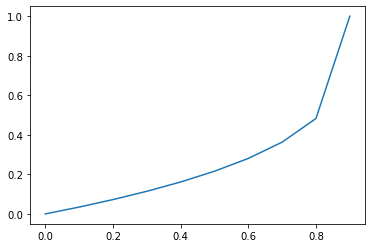

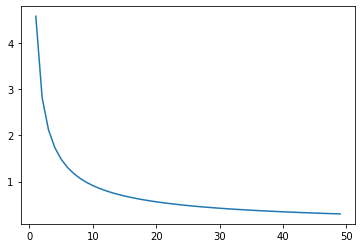

In [3]:
import matplotlib.pyplot as plt

plt.plot(np.arange(10)/10, beta.cdf(np.arange(10)/9, 1, 0.3))
plt.show()
plt.plot(beta.pdf(np.linspace(0,1), 0.3, 1))

In [14]:
xi=[1]
for i in range(10):
    xi.append(xi[-1]/1.1)
np.diff(xi), xi

(array([-0.09090909, -0.08264463, -0.07513148, -0.06830135, -0.06209213,
        -0.05644739, -0.05131581, -0.04665074, -0.04240976, -0.03855433]),
 [1,
  0.9090909090909091,
  0.8264462809917354,
  0.7513148009015777,
  0.6830134553650705,
  0.6209213230591549,
  0.5644739300537771,
  0.5131581182307065,
  0.4665073802097331,
  0.4240976183724846,
  0.3855432894295314])

In [44]:
        dictionary={}
        betas=np.linspace(0,1,10)**(1/0.3)
        dictionary.update({'pi_%.4f'%i:[0.1,2,2] for i in betas})


In [45]:
dictionary.keys()

dict_keys(['pi_0.0000', 'pi_0.0007', 'pi_0.0066', 'pi_0.0257', 'pi_0.0670', 'pi_0.1410', 'pi_0.2588', 'pi_0.4327', 'pi_0.6753', 'pi_1.0000'])

In [43]:
np.linspace(0,1,10)**(1/0.3)

array([0.00000000e+00, 6.59464824e-04, 6.64698891e-03, 2.56800472e-02,
       6.69974500e-02, 1.40958623e-01, 2.58838656e-01, 4.32698213e-01,
       6.75291980e-01, 1.00000000e+00])

In [6]:
import numpy as np

np.concatenate([[[[0,0],[1,1],[2,1]]],[[[0,2],[0,3],[3,4]]]], axis=0)

array([[[0, 0],
        [1, 1],
        [2, 1]],

       [[0, 2],
        [0, 3],
        [3, 4]]])

In [7]:
A=[np.array([[ 2.07823724, -1.53398828],
       [-1.53398828,  5.47046779]]), np.array([[ 1.97549677, -1.65713193],
       [-1.65713193,  6.37353799]]), np.array([[ 2.21446365, -1.804401  ],
       [-1.804401  ,  5.65885572]])]

In [10]:
np.concatenate([A,A],axis=0).shape

(6, 2, 2)

In [1]:
from diffusion_gibbs import DiffusionGibbs
import numpy as np

In [2]:
data_=np.load('./data/data_new.npy')
data=data_[:,:-1]
true_labels=data_[:,-1]
sampler=DiffusionGibbs(data, alpha=[1,2,1.5], hot_start=1, n_iter=1500)
print(sampler.pi, sampler.mus, sampler.Sigmas, len(sampler.mus), sampler.pi, sampler.nu, sampler.lambda_)


[0.429 0.194 0.377] [[ 0.38524611  2.68196842]
 [ 0.30457752 -2.32589791]
 [-2.35908774  4.00970766]] [array([[0.39089407, 0.47305254],
       [0.47305254, 1.00109554]]), array([[ 0.19980876, -0.15421082],
       [-0.15421082,  0.6013682 ]]), array([[ 0.3070628 , -0.17239951],
       [-0.17239951,  0.45066543]])] 3 [0.429 0.194 0.377] 5 0.025


In [54]:
dict=sampler.gibbs_sampler()

100%|██████████| 1500/1500 [00:04<00:00, 363.34it/s]


In [55]:
[np.unique(dict['zi'][i]) for i in range(10)]

[array([0, 1, 2]),
 array([0, 1, 2]),
 array([0, 1, 2]),
 array([0, 1, 2]),
 array([0, 1, 2]),
 array([0, 1, 2]),
 array([0, 1, 2]),
 array([0, 1, 2]),
 array([0, 1, 2]),
 array([0, 1, 2])]

In [56]:
dict['Sigmas'][:10,1]

array([[[ 1.99808762e-01, -1.54210820e-01],
        [-1.54210820e-01,  6.01368199e-01]],

       [[ 1.82224776e-01, -8.44319845e-02],
        [-8.44319845e-02,  4.54182125e-01]],

       [[ 1.58321827e-01,  2.30068536e-04],
        [ 2.30068536e-04,  4.37199940e-01]],

       [[ 1.26428355e-01, -4.74274016e-02],
        [-4.74274016e-02,  3.76751417e-01]],

       [[ 1.42136974e-01, -4.60817666e-02],
        [-4.60817666e-02,  3.52388361e-01]],

       [[ 1.21735740e-01, -2.45564910e-02],
        [-2.45564910e-02,  3.42411778e-01]],

       [[ 1.36866289e-01, -1.76167529e-02],
        [-1.76167529e-02,  3.96528909e-01]],

       [[ 1.31391422e-01, -4.68463614e-02],
        [-4.68463614e-02,  3.71453912e-01]],

       [[ 1.24387978e-01, -1.45367463e-02],
        [-1.45367463e-02,  3.58074066e-01]],

       [[ 1.04706574e-01, -3.03906205e-02],
        [-3.03906205e-02,  3.03353675e-01]]])

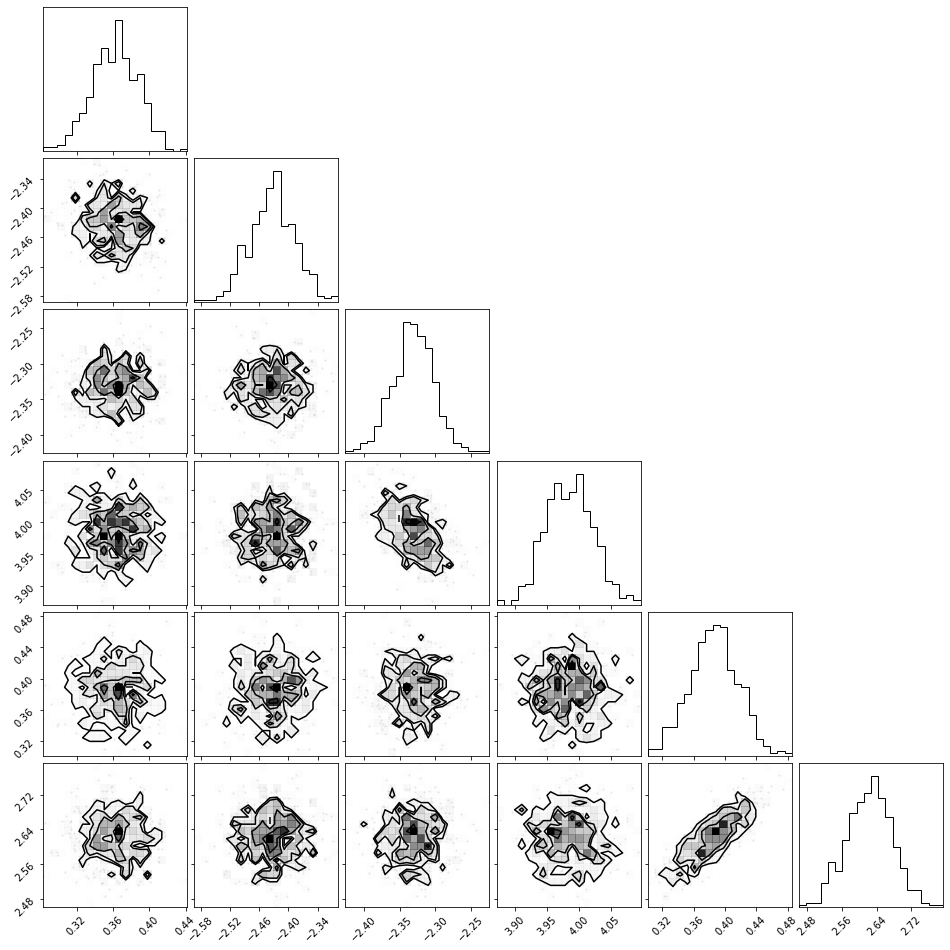

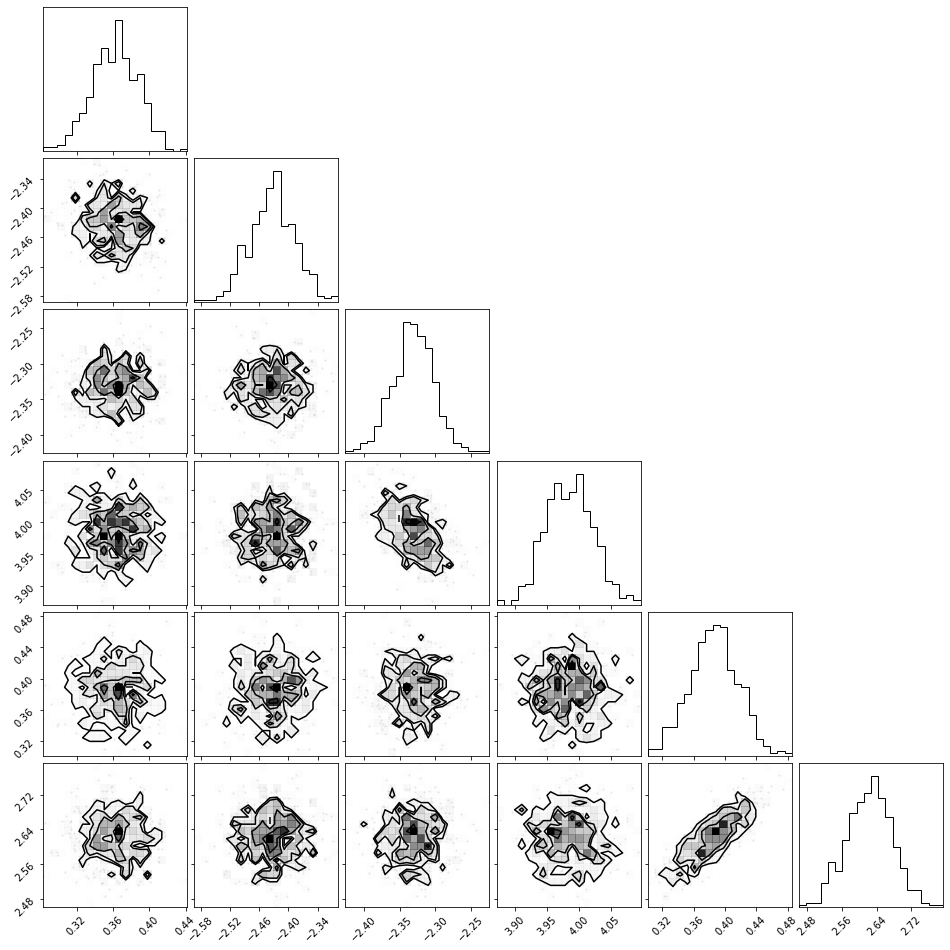

In [59]:
from corner import corner
corner(np.concatenate([dict['mus'][600::2,1],dict['mus'][600::2,2],dict['mus'][600::2,0]], axis=1))

In [20]:
np.concatenate([np.ones((1,3,2)), 2*np.ones((1,3,2))], axis=0)

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[2., 2.],
        [2., 2.],
        [2., 2.]]])

In [3]:
sampler.init_params(hot_start=0)
sampler.n_iter=50
dict2=sampler.diffusion_gibbs()

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:05<00:00,  8.91it/s]


In [6]:
dict2['mus_%.7f'%1].shape

(52, 3, 2)

In [8]:
import matplotlib.pyplot as plt

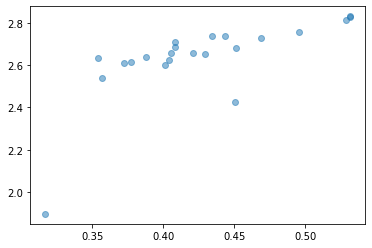

In [14]:
plt.plot(dict2['mus_%.7f'%1][30:,0,0],dict2['mus_%.7f'%1][30:,0,1], 'o', alpha=0.5)

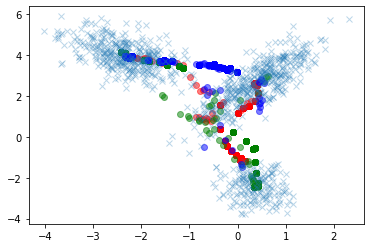

In [85]:
plt.scatter(dict2[0]['mus_%.7f'%1][00:,0,0], dict2[0]['mus_%.7f'%1][00:,0,1], c='r', alpha=0.5)
plt.scatter(dict2[0]['mus_%.7f'%1][00:,1,0], dict2[0]['mus_%.7f'%1][00:,1,1], c='g', alpha=0.5)
plt.scatter(dict2[0]['mus_%.7f'%1][00:,2,0], dict2[0]['mus_%.7f'%1][00:,2,1], c='b', alpha=0.5)

plt.plot(data[:,0], data[:,1], 'x', alpha=0.3)


# Analysis of diffusion gibbs

In [5]:
import numpy as np
from corner import corner

dict=np.load('parallel_tempering_simulation.npy', allow_pickle=True).item()
dict.keys()

dict_keys(['pi_0.0000000', 'zi_0.0000000', 'mus_0.0000000', 'Sigmas_0.0000000', 'loglikelihood_0.0000000', 'pi_0.0000546', 'zi_0.0000546', 'mus_0.0000546', 'Sigmas_0.0000546', 'loglikelihood_0.0000546', 'pi_0.0005507', 'zi_0.0005507', 'mus_0.0005507', 'Sigmas_0.0005507', 'loglikelihood_0.0005507', 'pi_0.0021276', 'zi_0.0021276', 'mus_0.0021276', 'Sigmas_0.0021276', 'loglikelihood_0.0021276', 'pi_0.0055508', 'zi_0.0055508', 'mus_0.0055508', 'Sigmas_0.0055508', 'loglikelihood_0.0055508', 'pi_0.0116785', 'zi_0.0116785', 'mus_0.0116785', 'Sigmas_0.0116785', 'loglikelihood_0.0116785', 'pi_0.0214450', 'zi_0.0214450', 'mus_0.0214450', 'Sigmas_0.0214450', 'loglikelihood_0.0214450', 'pi_0.0358494', 'zi_0.0358494', 'mus_0.0358494', 'Sigmas_0.0358494', 'loglikelihood_0.0358494', 'pi_0.0559484', 'zi_0.0559484', 'mus_0.0559484', 'Sigmas_0.0559484', 'loglikelihood_0.0559484', 'pi_0.0828507', 'zi_0.0828507', 'mus_0.0828507', 'Sigmas_0.0828507', 'loglikelihood_0.0828507', 'pi_0.1177122', 'zi_0.1177122

In [15]:
mask=dict['mus_%.7f'%1][3000:,0,0]>-0.6
mask=mask*(dict['mus_%.7f'%1][3000:,0,1]>0)

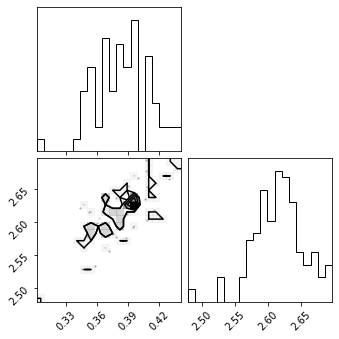

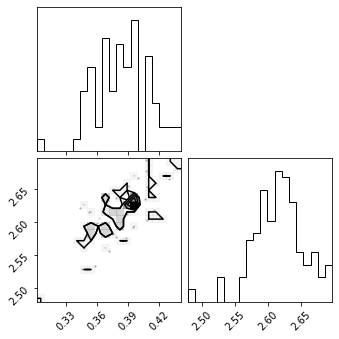

In [16]:
corner(dict['mus_%.7f'%1][3000:,0][mask])

In [5]:
import matplotlib.pyplot as plt

In [6]:
plt.scatter(dict['mus_%.7f'%0.0058881][15:,1,0], dict['mus_%.7f'%0.0058881][15:,1,1], c='r', alpha=0.5)
plt.scatter(dict['mus_%.7f'%0.0058881][15:,2,0], dict['mus_%.7f'%0.0058881][15:,2,1], c='g', alpha=0.5)
plt.scatter(dict['mus_%.7f'%0.0058881][20:,0,0], dict['mus_%.7f'%0.0058881][20:,0,1], c='b', alpha=0.5)
plt.plot(data[:,0], data[:,1], 'x', alpha=0.3)

KeyError: 'mus_0.0058881'

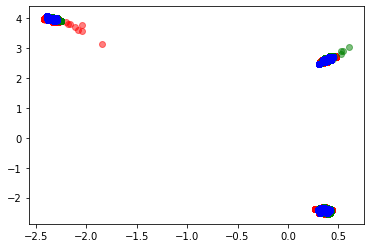

In [19]:
plt.scatter(dict['mus_%.7f'%1][15:,1,0], dict['mus_%.7f'%1][15:,1,1], c='r', alpha=0.5)
plt.scatter(dict['mus_%.7f'%1][15:,2,0], dict['mus_%.7f'%1][15:,2,1], c='g', alpha=0.5)
plt.scatter(dict['mus_%.7f'%1][20:,0,0], dict['mus_%.7f'%1][20:,0,1], c='b', alpha=0.5)
#plt.plot(data[:,0], data[:,1], 'x', alpha=0.3)

In [30]:
from scipy.stats import multivariate_normal
(multivariate_normal.pdf([0,0], mean=[0,0], cov=[[1,0],[0,1]])).reshape(-1)

array([0.15915494])

-18412.8736086461 -10316.075756868 [mpf('-72149.749508783818'), mpf('-71968.022341222226'), mpf('-14188.343052743394'), mpf('-6117.802432440003'), mpf('-6117.7125404998014'), mpf('-4513.7352632486791'), mpf('-4513.7092161179553'), mpf('-4105.2477752398145'), mpf('-4102.6230825727835'), mpf('-4102.4847313635346'), mpf('-4102.1111590160453'), mpf('-4102.064394815905'), mpf('-4102.0559009594754'), mpf('-4101.5601074827855'), mpf('-4023.0293975471309'), mpf('-3785.556596254648'), mpf('-3220.208046695886'), mpf('-1869.291962677961'), mpf('-1866.8094994371427'), mpf('-1866.7780014184557')] (mpf('-3180.0706026150756'), mpf('-3144.2999029148236')) [mpf('0.067320115516661311'), mpf('0.0026647222921797891'), mpf('0.00014210637571074'), mpf('1.2605587136171433e-8'), mpf('2.079205389869562e-12'), mpf('3.8796642407022356e-19'), mpf('3.6393217765131134e-26'), mpf('4.1021471438511737e-36'), mpf('5.4102568715478087e-48'), mpf('7.5231282314050438e-62'), mpf('8.9391893732671853e-78'), mpf('7.8205709603685518e-96'), mpf('4.9283506960034533e-116'), mpf('2.9833746099148504e-133'), mpf('4.6449423483657265e-146'), mpf('3.0044466615306524e-145'), mpf('2.758944822873717e-97'), mpf('2.8228451334777364e-111'), mpf('1.6010828526582239e-126')] (mpf('2.8173948518152839e-1258'), mpf('-2895.6162343399492'))